In [188]:
import os
import matplotlib.pyplot as plt
from skimage import io, transform
import numpy as np
import PIL

img_dir = 'imgs/lead/img/'
seg_dir = 'imgs/lead/seg/'

lst1 = os.listdir(img_dir)
lst2 = os.listdir(seg_dir)

print(len(lst1), len(lst2))

# plt.hist(np.reshape(image, -1))
# plt.plot(np.sort(np.reshape(image, -1)))

# np.unique(image)
# ll = []
DATA = np.zeros((len(lst1), 64, 128, 3))
for i, file in enumerate(lst1):
    image = io.imread(img_dir + file)
    DATA[i] = image

SEGMENT_DATA = np.zeros((len(lst2), 64, 128, 3))
for i, file in enumerate(lst2):
    image = io.imread(seg_dir + file)
    SEGMENT_DATA[i] = image
    # ll.extend(image)

SEGMENT_1D = SEGMENT_DATA
for c in range(3):
    # th = [25, 75, 200]  # 0, 50, 170, 255,
    SEGMENT_1D[:, :, :, c] = np.where(SEGMENT_DATA[:,:,:,c] <= 25, 0,  SEGMENT_DATA[:,:,:,c])
    SEGMENT_1D[:, :, :, c] = np.where((25 < SEGMENT_DATA[:,:,:,c]) * (SEGMENT_DATA[:,:,:,c] <= 75), 50, SEGMENT_DATA[:,:,:,c])
    SEGMENT_1D[:, :, :, c] = np.where((75 < SEGMENT_DATA[:,:,:,c]) * (SEGMENT_DATA[:,:,:,c] <= 200), 170, SEGMENT_DATA[:,:,:,c])
    SEGMENT_1D[:, :, :, c] = np.where((200 < SEGMENT_DATA[:,:,:,c]) * (SEGMENT_DATA[:,:,:,c] <= 255), 255, SEGMENT_DATA[:,:,:,c])

# find how many classes in the segmented images
col = []
for i in range(1000):
    ii = PIL.Image.fromarray(SEGMENT_1D[i].astype(np.uint8), 'RGB')
    tmp = ii.getcolors() # throw the number of colors
    col.extend([jj[1] for jj in tmp])

print(np.unique(np.array(col), axis=0))

# from RGB to classes, manual
SEGMENT_1D = SEGMENT_1D.astype(np.uint8)
data_class = np.zeros_like(SEGMENT_1D[:,:,:,0])

# to be fixed, barrels same as guardrail
for idx, im in enumerate(SEGMENT_1D):
    data_class[idx] = np.where( np.array(im == (0,  0,  0))[:, :, 0], 0, data_class[idx])
    data_class[idx] = np.where( np.array(im == (0,  50,  70))[:, :, 0], 1, data_class[idx])
    data_class[idx] = np.where( np.array(im == (50,  50,  50))[:, :, 0], 2, data_class[idx])
    data_class[idx] = np.where( np.array(im == (170,  0,  0))[:, :, 0], 3, data_class[idx])
    data_class[idx] = np.where( np.array(im == (170,  0,  50))[:, :, 0], 4, data_class[idx])
    data_class[idx] = np.where( np.array(im == (170,  50,  0))[:, :, 0], 5, data_class[idx])
    data_class[idx] = np.where( np.array(im == (170,  50,  50))[:, :, 0], 6, data_class[idx])
    data_class[idx] = np.where( np.array(im == (170,  170,  170))[:, :, 0], 7, data_class[idx])
    data_class[idx] = np.where( np.array(im == (255,  255,  50))[:, :, 0], 8, data_class[idx])
    data_class[idx] = np.where( np.array(im == (255,  255,  255))[:, :, 0], 9, data_class[idx])


9473 9473
[[  0   0   0]
 [  0  50 170]
 [ 50  50  50]
 [170   0   0]
 [170   0  50]
 [170  50   0]
 [170  50  50]
 [170 170 170]
 [255 255  50]
 [255 255 255]]


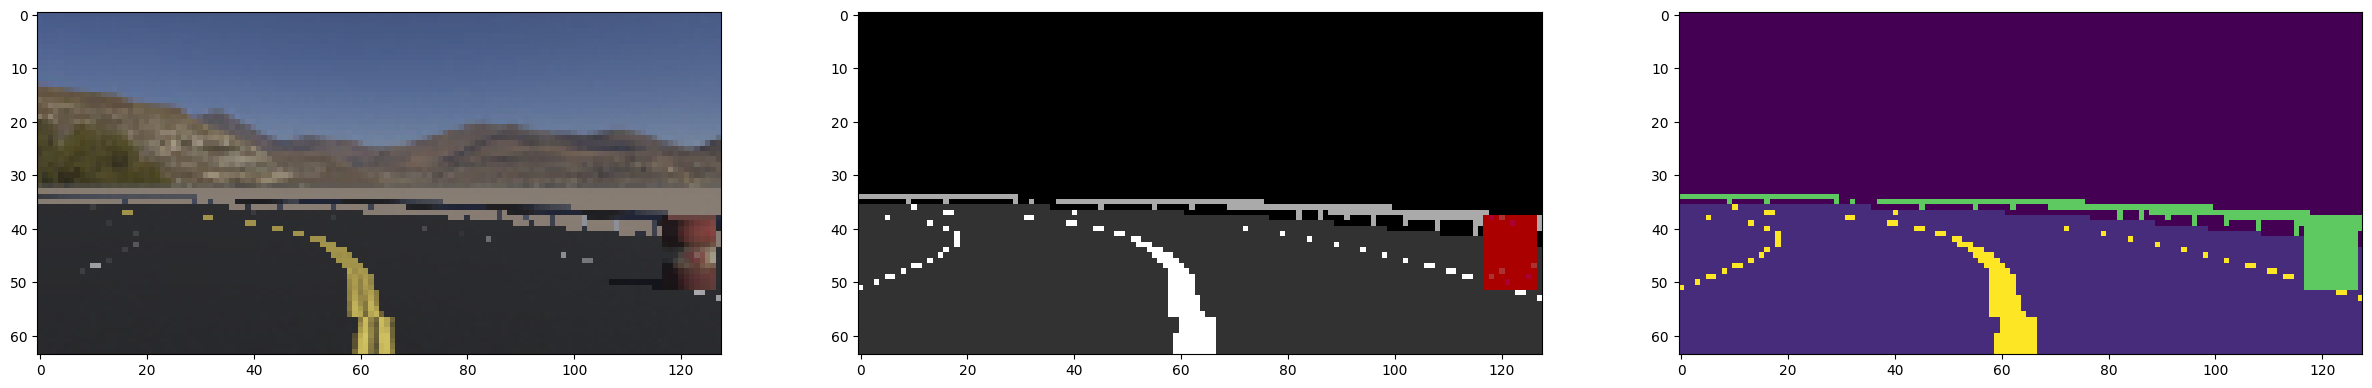

In [192]:
idx = 943
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (30, 45))

ax1.imshow(DATA[idx].astype(np.uint8))
ax2.imshow(SEGMENT_DATA[idx].astype(np.uint8))
ax3.imshow(data_class[idx])

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 4 dimension(s) and the array at index 1 has 3 dimension(s)

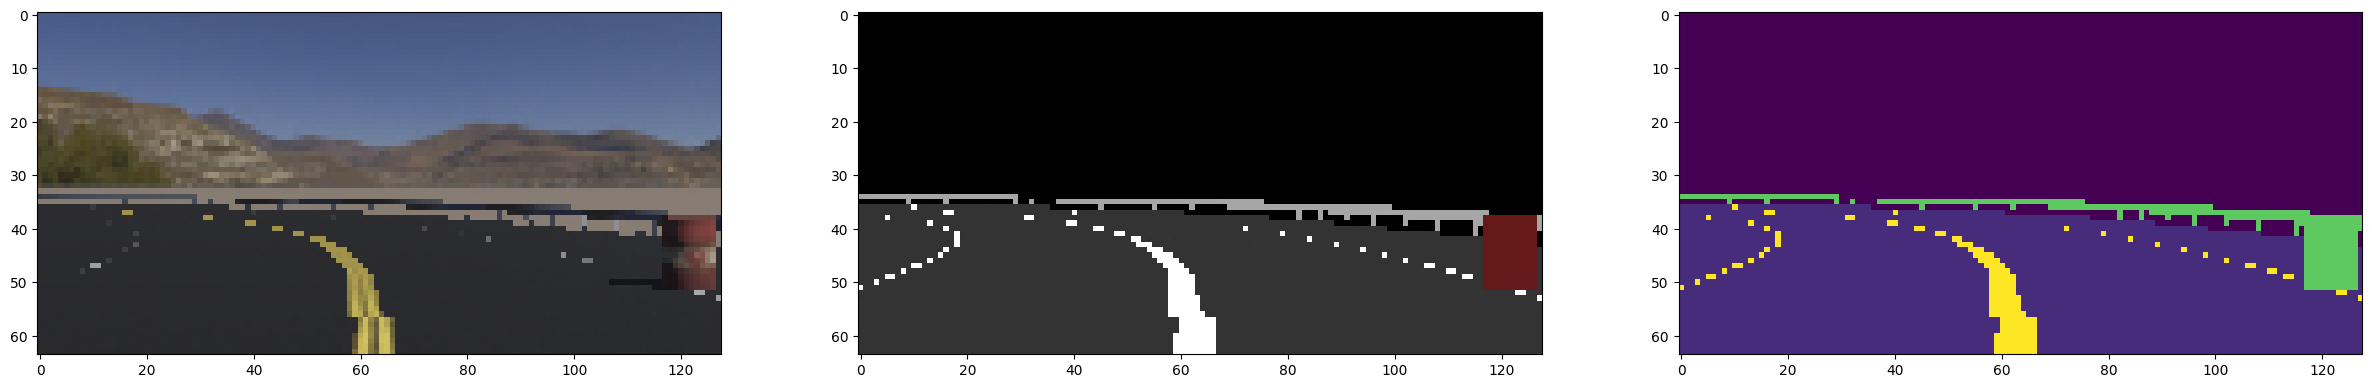

In [187]:
idx = 943
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (30, 45))

image = io.imread(img_dir + lst1[idx])
ax1.imshow(image)
image = io.imread(seg_dir + lst2[idx])
ax2.imshow(image)
ax3.imshow(data_class[idx])

In [194]:
with open('x_seg.npy', 'wb') as f:
    np.save(f, DATA)

with open('y_seg.npy', 'wb') as f:
    np.save(f, data_class)
#
#     np.save(f, np.array([1, 3]))
#
# with open('test.npy', 'rb') as f:
#
#     a = np.load(f)
#
#     b = np.load(f)